In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from random import randrange

In [ ]:
df = pd.read_csv('tripadvisor_restaurants.csv')

In [ ]:
df.dtypes

address             object
domain              object
extracted_date      object
food_category       object
food_types          object
link                object
opinions            object
min_price           object
max_price          float64
rating             float64
restaurant_name     object
dtype: object

In [ ]:
df.head(10)

,address,domain,extracted_date,food_category,food_types,link,opinions,min_price,max_price,rating,restaurant_name
0,"Avenida Emilio Castelar 44, Ciudad de M̩xico 1...",www.tripadvisor.com.mx,08/09/22 17:49,"Almuerzo, Cena, Bebidas","Vino y cerveza, Servicio de mesa",https://www.tripadvisor.com.mx/Restaurant_Revi...,2,144.0,363.868154,5.0,Pardela
1,"AVENIDA SANTA FE 160 AVENIDA SANTA FE 160, Ciu...",www.tripadvisor.com.mx,08/09/22 17:49,"Italiana, Mediterr��nea, Europea, Saludable, T...","Apto para vegetarianos, Opciones veganas, Opci...",https://www.tripadvisor.com.mx/Restaurant_Revi...,741,402.0,1004.000000,5.0,Quattro Gastronom�_a Italiana
2,Avenida Paseo de La Reforma 297 Sofitel Mexico...,www.tripadvisor.com.mx,08/09/22 17:49,"Desayuno, Almuerzo, Brunch","Reservaciones, Asiento, Sirve alcohol, Bar com...",https://www.tripadvisor.com.mx/Restaurant_Revi...,"1,080",144.0,363.868154,5.0,Cityzen Rooftop Kitchen
3,Calzada Acoxpa # 610 Centro Comercial Gran Ter...,www.tripadvisor.com.mx,08/09/22 17:49,"Mexicana, Parrilla, Contempor��nea","Almuerzo, Cena, Brunch, Abierto hasta tarde, B...",https://www.tripadvisor.com.mx/Restaurant_Revi...,643,250.0,600.000000,5.0,Porfirio's Coapa
4,Calle Goldsmith Polanco III Secc. 66 Miguel Hi...,www.tripadvisor.com.mx,08/09/22 17:49,"Asi��tica, Tailandesa, Coreana, Fusi�_n",Apto para vegetarianos,https://www.tripadvisor.com.mx/Restaurant_Revi...,373,1200.0,1800.000000,5.0,KYU M��XICO
5,"Av. Presidente Masaryk 294, Colonia Polanco IV...",www.tripadvisor.com.mx,08/09/22 17:49,"Mariscos, Mediterr��nea, Internacional, Contem...",Opciones sin gluten,https://www.tripadvisor.com.mx/Restaurant_Revi...,693,601.0,801.000000,5.0,Taboo Polanco
6,"Tonala 144 Roma Norte Primer Piso, Ciudad de M...",www.tripadvisor.com.mx,08/09/22 17:49,"Almuerzo, Cena",NaN,https://www.tripadvisor.com.mx/Restaurant_Revi...,NaN,144.0,363.868154,NaN,Sake Sushi Bar ( Roma )
7,Avenida Miguel Angel de Quevedo 227 Plaza Oasi...,www.tripadvisor.com.mx,08/09/22 17:49,"Argentina, Internacional, Parrilla, Contempor�...",Opciones sin gluten,https://www.tripadvisor.com.mx/Restaurant_Revi...,760,500.0,800.000000,4.5,Cambalache Plaza Oasis
8,"Avenida Presidente Masaryk, 311 Polanco, Ciuda...",www.tripadvisor.com.mx,08/09/22 17:49,"Bar, Mediterr��nea, Griega","Almuerzo, Cena, Abierto hasta tarde, Bebidas",https://www.tripadvisor.com.mx/Restaurant_Revi...,396,700.0,1500.000000,5.0,Ilios Greek Estiatorio Polanco
9,Calle Juan Sanchez Azcona No. 529 Esq. Diagona...,www.tripadvisor.com.mx,08/09/22 17:49,"Apto para vegetarianos, Opciones sin gluten","Almuerzo, Cena",https://www.tripadvisor.com.mx/Restaurant_Revi...,404,144.0,363.868154,5.0,Sonora Grill Narvarte


In [ ]:
# Transforming min_price and max_price to float type 
df['min_price'] = pd.to_numeric(df['min_price'], errors='coerce')
#df['max_price'] = pd.to_numeric(df['max_price'], errors='coerce')



In [ ]:
# Creating instances for mean and median of prices
min_price_mean = df['min_price'].mean()
max_price_median = df['max_price'].median()
# Creating mode variables decidind to fill na with these
max_price_mode = df['max_price'].mode()
min_price_mode = df['min_price'].mode() 
print(min_price_mode, max_price_median)

0    100.0
dtype: float64 300.0


In [ ]:
# Replacing values with mode st
df['max_price'].fillna(random.uniform(300,370), inplace=True)

In [ ]:
df['min_price'].fillna(random.randrange(100,150), inplace=True)

In [ ]:
df['min_price'] = df['min_price'].fillna(min_price_mode, inplace=True)

df['max_price'] = df['max_price'].fillna(max_price_mode, inplace=True)


In [ ]:
# Replacing unnormal characters
df['min_price'] = df['min_price'].replace('n a, Cont n a, , , Fusi _n,',' ', regex=True)

In [ ]:
# Practice create/drop new columns
df.drop('Nueva Columna',axis=1, inplace=True)

In [ ]:
df['max_price'] = df['max_price'].dropna(axis=0,inplace=True)

In [ ]:
df['min_price'].isnull().sum()

0

In [ ]:
# Changing nan by interpolation doesnt work for analysis
df['min_price'] = df['min_price'].interpolate()
df['min_price'].mean()

423.03518298125556

In [ ]:
#Changing nan by interpolation
df['max_price'] = df['max_price'].interpolate()
df['max_price'].mean()

68068.10257363878

<AxesSubplot:xlabel='min_price', ylabel='Count'>

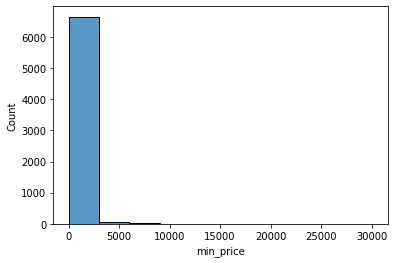

In [ ]:
sns.histplot(df['min_price'], bins=10)

In [ ]:
%cd '~/work'
%mkdir 'db'

/


In [ ]:
sns.histplot(df['max_price'])

KernelInterrupted: Execution interrupted by the Jupyter kernel.

In [ ]:
dir_pandas = '~/work/db/{}'.format('CleanedRestaurantList_TripAdvisor.csv')
dir_pandas

'~/work/db/CleanedRestaurantList_TripAdvisor.csv'

In [ ]:
df.to_csv(dir_pandas, index=True)


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1fb563c0-3c4e-4849-a6dd-61947eda0562' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>